# CHƯƠNG 4: SIMPLE MODELS OF WALKING AND RUNNING




## Overview


* **Chuyển đổi phương pháp điều khiển:** Chuyển từ các hệ cân bằng tĩnh (như Acrobot, Cart-pole - điều khiển cân bằng tại vị trí thẳng đứng, 1 góc bất kỳ,..) sang hệ robot đi bộ/chạy (điều khiển cân bằng động - một chuỗi động tác lặp lại).
* **Mở rộng khái niệm ổn định:** Ổn định không nhất thiết là hệ thống phải dừng lại ở một trạng thái tĩnh. Việc hệ thống lặp đi lặp lại một chuỗi hành động cũng được xem là một dạng ổn định (ổn định chu kỳ). Sự lặp lại này được gọi là **"Chu kỳ giới hạn" (Limit Cycle)**.
* **Phương pháp phân tích tính ổn định:** Chuyển bài toán từ "xét tính ổn định của điểm cố định" sang "xét tính ổn định của một chu kỳ giới hạn". Để làm điều này, ta sử dụng **Bản đồ Poincaré (Poincaré Map)** để rời rạc hóa hệ liên tục, đưa bài toán trở về việc xét tính ổn định của điểm cố định trên bản đồ rời rạc.
* **Các mô hình đơn giản hóa:** Để khảo sát hệ thống phức tạp, hệ động lực học thay đổi (chịu tác động của phản lực mặt đất), ta sử dụng các mô hình đơn giản hóa dần:
    * **Rimless Wheel:** Chỉ xét chân trụ, bỏ qua khối lượng chân.
    * **Compass Gait:** Thêm khối lượng vào chân, có chân vung.
    * **Kneed Walker:** Giống Compass gait nhưng có thêm khớp gối.
    * **SLIP:** Mô hình chạy (lò xo).

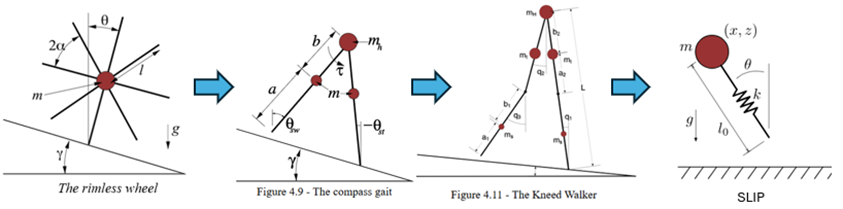

## 4.1. Limit Cycle and Poincare Maps



### a. Limit Cycles (Chu kỳ giới hạn)



**1. Định nghĩa:**
* Chu kỳ giới hạn là tập hợp các điểm tạo thành một quỹ đạo tuần hoàn (một vòng lặp kín trong không gian trạng thái).
* Khác với các hệ thống trước đây hội tụ về một điểm đứng yên ($x^*$), hệ thống này hội tụ về một vòng lặp ($x^*(t) = x^*(t+T)$).

**2. Phân loại:**
* **Stable Limit Cycle (Chu kỳ giới hạn ổn định):** Là tập giới hạn của các quỹ đạo lân cận khi $t \rightarrow +\infty$. (Quỹ đạo bị hút vào vòng lặp).
* **Unstable Limit Cycle (Chu kỳ giới hạn không ổn định):** Là tập giới hạn khi $t \rightarrow -\infty$. (Quỹ đạo bị đẩy ra xa vòng lặp).

**3. Ví dụ: Dao động Van der Pol**
Mô hình đơn giản nhất thể hiện hành vi chu kỳ giới hạn là dao động Van der Pol, mô tả bởi phương trình vi phân:
$$\ddot{q} + \mu(q^2 - 1)\dot{q} + q = 0, \quad \mu > 0$$

* $\mu$: Tham số điều khiển mức độ phi tuyến (hệ số giảm chấn).
* **Cơ chế tự điều chỉnh năng lượng:**
    * Khi $|q| > 1$: Hệ số giảm chấn dương $\mu(q^2-1) > 0 \rightarrow$ Tiêu tán năng lượng (Biên độ giảm).
    * Khi $|q| < 1$: Hệ số giảm chấn âm $\mu(q^2-1) < 0 \rightarrow$ Bổ sung năng lượng (Biên độ tăng).
    * $\rightarrow$ Hệ thống tự động cân bằng năng lượng để duy trì dao động ổn định.
* **Điểm ngoại lệ:** Tại gốc tọa độ $q=0, \dot{q}=0$, không có gia tốc/lực để thoát khỏi trạng thái này (điểm cân bằng không ổn định).

**4. Phân biệt các loại ổn định (Rất quan trọng trong Robot đi bộ)**
Từ quan sát đồ thị pha và đồ thị thời gian của hệ Van der Pol, ta phân biệt hai khái niệm:

* **Ổn định theo thời gian (Trajectory Stability - Asymptotic Stability):**
    * Yêu cầu nghiệm thực tế $x(t)$ phải hội tụ về nghiệm mong muốn $x^*(t)$ tại **cùng một thời điểm**.
    * Điều kiện: $\lim_{t \to \infty} |x(t) - x^*(t)| = 0$.
    * **Vấn đề:** Các quỹ đạo tuy cùng hội tụ về một vòng lặp nhưng có thể bị lệch pha (không đồng bộ nhịp). Trong Van der Pol, khoảng cách $|x(t) - x^*(t)|$ không tiến về 0 do lệch pha.
    * **Ứng dụng:** Cần thiết cho robot tay máy (yêu cầu chính xác thời gian), nhưng gây tốn năng lượng không cần thiết cho robot đi bộ.

* **Ổn định quỹ đạo (Orbital Stability):**
    * Chỉ yêu cầu nghiệm thực tế hội tụ về **đường quỹ đạo** (hình dáng hình học của vòng lặp) mà không quan tâm đến vị trí trên vòng lặp tại thời điểm $t$.
    * Điều kiện: $\min_{\tau} ||x(t) - x^*(\tau)|| \rightarrow 0$.
    * **Ý nghĩa:** Robot đi bộ chỉ cần duy trì được dáng đi (không ngã), không bắt buộc phải đặt chân tại đúng giây thứ $t$ chính xác. Đây là tiêu chuẩn ổn định chính cho robot bước đi (Underactuated walking).

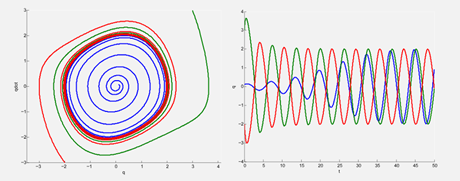

### b. Bản đồ Poincaré (Poincaré Map)


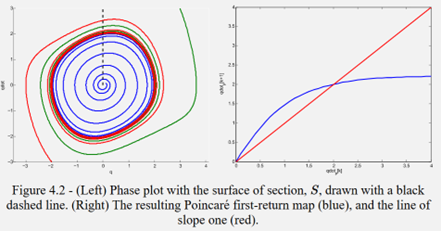
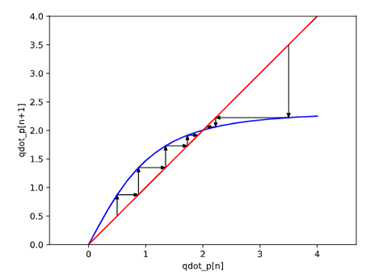


Để đơn giản hóa việc phân tích tính ổn định của một chu kỳ giới hạn (hệ liên tục), ta biến đổi nó thành bài toán xét tính ổn định của một điểm cố định (hệ rời rạc).

**1. Nguyên lý xây dựng:**
* Xét hệ động lực học: $\dot{x} = f(x), \quad x \in \mathbb{R}^n$.
* **Mặt cắt (Poincaré Section) $S$:** Chọn một mặt cắt $(n-1)$ chiều mà quỹ đạo của hệ thống cắt xuyên qua (không tiếp xúc).
* **Hàm chuyển đổi (Map) $P$:** Xác định hàm $P: S \rightarrow S$ ánh xạ từ điểm cắt lần thứ $n$ sang điểm cắt lần thứ $n+1$:
$$x_p[n+1] = P(x_p[n])$$

> **[Hình ảnh 4.2: (Trái) Đồ thị pha với mặt cắt S nét đứt. (Phải) Bản đồ Poincaré tương ứng (màu xanh) và đường phân giác (màu đỏ)]**

**2. Điểm cố định (Fixed Point):**
* Nếu $P(x^*) = x^*$, thì $x^*$ là một **điểm cố định** trên bản đồ Poincaré.
* Điểm $x^*$ này tương ứng với một **Chu kỳ giới hạn (Limit Cycle)** khép kín trong hệ liên tục ban đầu.

**3. Xét tính ổn định:**

#### 3.1. Tính toán đại số (Algebraic Analysis):
Ta tuyến tính hóa bản đồ quanh điểm cố định bằng cách tính đạo hàm Jacobian:
$$A = \nabla P = \frac{\partial P}{\partial x_p} \bigg|_{x^*}$$

Ý nghĩa: Sai số bước sau bằng sai số bước trước nhân với $A$ ($\Delta x_{n+1} \approx A \cdot \Delta x_n$).
* $|A| < 1$: **Ổn định (Stable)** - Hệ hội tụ về điểm cố định (Chu kỳ giới hạn ổn định).
* $|A| > 1$: **Không ổn định (Unstable)** - Hệ phân kỳ ra xa.
* $|A| = 1$: **Ổn định biên (Neutrally Stable)** - Chu kỳ trung gian.

#### 3.2. Phương pháp đồ thị - Cầu thang (Staircase Method / Cobwebbing):
Đây là phương pháp trực quan để phân tích hệ rời rạc 1 chiều $x_{n+1} = P(x_n)$.

> **[Hình ảnh 4.3: Minh họa phương pháp cầu thang hội tụ về điểm cố định]**

* **Cách vẽ:**
    1.  Vẽ đường cong $x_{n+1} = P(x_n)$ và đường phân giác $x_{n+1} = x_n$. Giao điểm là **Fixed Point**.
    2.  **Bước dọc:** Từ $x_n$ trên trục hoành, gióng thẳng đứng lên đường cong $P$ để tìm giá trị $x_{n+1}$.
    3.  **Bước ngang:** Từ giao điểm đó, gióng ngang sang đường phân giác để đưa giá trị $x_{n+1}$ trở lại trục hoành (làm đầu vào cho bước tiếp theo).
    4.  Lặp lại quá trình.

* **Ý nghĩa hình dáng:**
    * **Hội tụ (Ổn định):** Các bậc cầu thang co dần về giao điểm.
    * **Phân kỳ (Mất ổn định):** Các bậc cầu thang giãn ra xa giao điểm.
    * **Dao động:** Nếu đạo hàm $A < 0$ (đường cong dốc xuống), cầu thang sẽ nhảy qua lại quanh điểm cố định (xoắn ốc).

## 4.2. Mô hình đi bộ đơn giản (Simple Models of Walking)



### 4.2.1. The Rimless Wheel (Bánh xe không vành)


#### a. Các giả định (Assumptions):


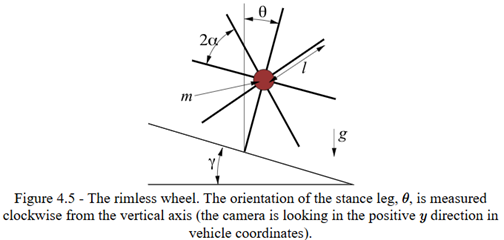

Đây là mô hình đi bộ thụ động đơn giản nhất, chỉ xét động lực học của chân trụ và giả định rằng luôn có một chân vung sẵn sàng tiếp đất ngay khi cần thiết.
1.  **Va chạm mềm (Inelastic collision):** Va chạm với mặt đất là không đàn hồi, không có xung lực phản hồi. Toàn bộ động năng theo phương vuông góc với hướng di chuyển mới bị tiêu tán.
2.  **Không trượt (No slip):** Chân trụ hoạt động như một khớp chốt cố định tại điểm tiếp xúc với mặt đất.
3.  **Chuyển chân tức thời:** Thời gian chuyển chân là tức thời, không có giai đoạn hai chân cùng chạm đất (double support).

**Các tham số:**
* $\gamma$: Góc dốc (Slope angle).
* $\alpha$: Một nửa góc mở giữa hai chân.
* $l$: Chiều dài chân.
* $m$: Khối lượng tập trung tại hông (trục bánh xe).

#### b. Stance Dynamics (Động lực học pha chống)



Trong pha này, chân trụ giữ nguyên điểm tiếp xúc, hệ thống hoạt động như một con lắc ngược. Phương trình chuyển động:
$$\ddot{\theta} = \frac{g}{l}\sin(\theta)$$

Giả sử hệ bắt đầu ngay sau khi chân chạm đất, tại góc $\theta(0^+) = \gamma - \alpha$. Để thực hiện được một bước đi (khối tâm vượt qua đỉnh cao nhất - vị trí thẳng đứng $\theta=0$), vận tốc góc ban đầu $\dot{\theta}(0^+)$ phải lớn hơn một ngưỡng $\omega_1$.

**Cách tính ngưỡng vận tốc $\omega_1$:**
Ta sử dụng nguyên lý bảo toàn năng lượng cơ học (Động năng ban đầu phải đủ để thắng độ chênh lệch thế năng khi leo lên đỉnh dốc).

1.  **Thế năng tại góc $\theta$:**
    $$U(\theta) = mgl(1 - \cos\theta)$$
    *(Chọn mốc thế năng $U=0$ tại vị trí cao nhất $\theta=0$)*.

2.  **Động năng quay:**
    $$T = \frac{1}{2}I\dot{\theta}^2 = \frac{1}{2}ml^2\dot{\theta}^2$$

3.  **Điều kiện vượt đỉnh:** Động năng tại vị trí bắt đầu phải bằng độ tăng thế năng để đến đỉnh:
    $$\frac{1}{2}ml^2\omega_1^2 = U(\theta=0) - U(\theta=\gamma-\alpha)$$
    $$\frac{1}{2}ml^2\omega_1^2 = 0 - [-mgl(1 - \cos(\gamma - \alpha))]$$
    $$\frac{1}{2}ml^2\omega_1^2 = mgl(1 - \cos(\gamma - \alpha))$$

$\Rightarrow$ **Công thức vận tốc tới hạn:**
$$\omega_1 = \sqrt{\frac{2g}{l}(1 - \cos(\gamma - \alpha))}$$

* Nếu $\gamma = \alpha$: $\omega_1 = 0$ (Điểm xuất phát trùng với đỉnh cân bằng).
* Nếu $\gamma > \alpha$: $\omega_1$ không tồn tại (Trọng tâm đã nằm phía trước điểm tiếp xúc, robot tự đổ về trước).

**Vận tốc cuối pha chống (ngay trước va chạm):**
Khi chân tiếp theo chạm đất tại góc $\theta(t^-) = \gamma + \alpha$, bảo toàn năng lượng cho ta mối quan hệ vận tốc:
$$\dot{\theta}(t^-)^2 = \dot{\theta}(0^+)^2 + \frac{4g}{l}\sin(\alpha)\sin(\gamma)$$

#### c. Foot Collision (Va chạm bàn chân)


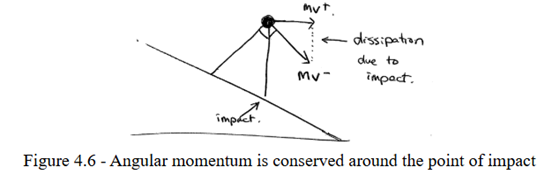


Khi chân vung chạm đất, một va chạm xung lực xảy ra. Quá trình này được mô hình hóa là va chạm mềm (inelastic), gây mất năng lượng đột ngột.

**Nguyên lý:** Bảo toàn Momen động lượng góc (Angular Momentum) quanh điểm va chạm (chân tiếp xúc mới).

**1. Trước va chạm ($t^-$):**
Hệ thống quay quanh chân sau (chân trụ cũ). Động lượng góc tính quanh điểm tiếp xúc *mới* (chân trước) là:
$$L(t^-) = m l^2 \dot{\theta}(t^-) \cos(2\alpha)$$
*(Hệ số $\cos(2\alpha)$ xuất hiện do việc chiếu vectơ vận tốc từ hệ trục chân cũ sang chân mới)*.

**2. Sau va chạm ($t^+$):**
Hệ thống quay quanh chân trước (chân trụ mới). Động lượng góc là:
$$L(t^+) = m l^2 \dot{\theta}(t^+)$$

**3. Phương trình chuyển đổi vận tốc:**
Áp dụng định luật bảo toàn $L(t^-) = L(t^+)$:
$$m l^2 \dot{\theta}(t^+) = m l^2 \dot{\theta}(t^-) \cos(2\alpha)$$
$$\Rightarrow \dot{\theta}(t^+) = \dot{\theta}(t^-) \cos(2\alpha)$$

**Ý nghĩa vật lý:**
* Vì $\cos(2\alpha) < 1$ (với $\alpha > 0$), vận tốc góc luôn giảm sau mỗi lần va chạm.
* Đây là cơ chế tiêu tán năng lượng chính của bước đi thụ động.
* Nếu có dốc ($\gamma > 0$), năng lượng thế năng thu được từ trọng lực sẽ bù đắp cho phần năng lượng mất đi này, giúp hệ duy trì chu kỳ giới hạn ổn định.

#### d. Forward Simulation


Khi chạy mô phỏng hệ thống theo thời gian, ta quan sát thấy các đặc điểm sau trên đồ thị pha:
* **Bất đối xứng:** Đồ thị pha bị lệch so với trục $\theta=0$ do ảnh hưởng của góc nghiêng mặt nền $\gamma$.
* **Bước nhảy năng lượng:** Các đường quỹ đạo có sự gián đoạn (bước nhảy dọc) tại các thời điểm va chạm. Điều này thể hiện sự giảm vận tốc đột ngột theo hệ số $\cos(2\alpha)$.
* **Hội tụ:** Từ các điều kiện ban đầu khác nhau, vận tốc của hệ dần hội tụ về một quỹ đạo duy nhất lặp đi lặp lại. Đây chính là **Chu kỳ giới hạn (Limit Cycle)**, nơi năng lượng mất đi do va chạm cân bằng chính xác với năng lượng thu được từ trọng lực.

(Bên trái là đồ thị pha của Rimless Wheel, bên phải là đồ thị pha của con lắc đơn)

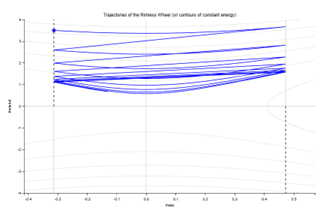
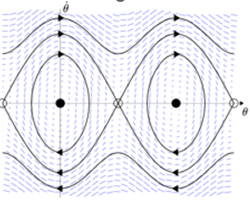

In [8]:
#@title Mô phỏng Rimless Wheel (Click đúp để xem code)
!pip install mpld3
!pip install drake
!pip install underactuated
import mpld3
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
from pydrake.all import (
    DiagramBuilder,
    MeshcatVisualizer,
    SceneGraph,
    Simulator,
    StartMeshcat,
)
from pydrake.examples import RimlessWheel, RimlessWheelGeometry, RimlessWheelParams

from underactuated import running_as_notebook

if running_as_notebook:
    mpld3.enable_notebook()
def rimless_wheel(slope=0.08, initial_angle=0, initial_angular_velocity=1.5):
    params = RimlessWheelParams()
    params.set_slope(slope)

    builder = DiagramBuilder()
    rimless_wheel = builder.AddSystem(RimlessWheel())
    scene_graph = builder.AddSystem(SceneGraph())
    RimlessWheelGeometry.AddToBuilder(
        builder,
        rimless_wheel.get_floating_base_state_output_port(),
        params,
        scene_graph,
    )
    visualizer = MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat)
    meshcat.Set2dRenderMode(xmin=-4, xmax=14, ymin=-8, ymax=8)

    diagram = builder.Build()
    simulator = Simulator(diagram)

    context = simulator.get_mutable_context()

    diagram.GetMutableSubsystemContext(rimless_wheel, context).get_numeric_parameter(
        0
    ).set_slope(slope)
    context.SetAccuracy(1e-4)
    context.SetContinuousState([initial_angle, initial_angular_velocity])
    simulator.Initialize()
    visualizer.StartRecording(False)
    simulator.AdvanceTo(25.0 if running_as_notebook else 0.1)
    visualizer.PublishRecording()


rimless_wheel()



In [13]:
# Chạy để hiển thị mô phỏng
meshcat = StartMeshcat()
# Thử với các giá trị 10; -4.8;-3 rồi quan sát
rimless_wheel(initial_angular_velocity=5.0)

INFO:drake:Meshcat listening for connections at http://localhost:7000


In [10]:
# @title Biểu đồ pha
def rimless_wheel_return_map(initial_angular_velocity=2.5, duration=1.5):
    rimless_wheel = RimlessWheel()
    simulator = Simulator(rimless_wheel)
    context = simulator.get_mutable_context()
    params = context.get_numeric_parameter(0)
    qmin = params.slope() - rimless_wheel.calc_alpha(params) - 0.1
    qmax = params.slope() + rimless_wheel.calc_alpha(params) + 0.1
    qdmin = -4
    qdmax = 4

    context.SetAccuracy(1e-2)
    integrator = simulator.get_mutable_integrator()

    fig, ax = plt.subplots(figsize=(10, 6))

    # TODO(russt): make the slope interactive, too.
    def simulate(initial_angular_velocity=1.5, duration=1.5):
        rimless_wheel.SetDefaultContext(context)
        context.SetTime(0.0)
        if initial_angular_velocity >= 0:
            initial_angle = params.slope() - rimless_wheel.calc_alpha(params)
        else:
            initial_angle = params.slope() + rimless_wheel.calc_alpha(params)
        if initial_angular_velocity == 0:
            # Set double_support = True.
            context.get_mutable_abstract_state(0).set_value(True)

        context.SetContinuousState([initial_angle, initial_angular_velocity])

        integrator.StartDenseIntegration()
        simulator.Initialize()
        simulator.AdvanceTo(duration if running_as_notebook else 0.1)
        pp = integrator.StopDenseIntegration()

        return pp.vector_values(pp.get_segment_times())

    if False:
        data = simulate()
        (line,) = ax.plot(data[0, :], data[1, :], "b")
        (pt,) = ax.plot(data[0, 0], data[1, 0], "b*", markersize=12)

        def update(initial_angular_velocity):
            data = simulate(initial_angular_velocity)
            line.set_xdata(data[0, :])
            line.set_ydata(data[1, :])
            pt.set_xdata(data[0, 0])
            pt.set_ydata(data[1, 0])
            fig.canvas.draw()

        interact(
            update,
            initial_angular_velocity=widgets.FloatSlider(
                min=qdmin, max=qdmax, step=0.1, value=1.1
            ),
        )

    else:
        data = simulate(initial_angular_velocity, duration)
        ax.plot(data[0, :], data[1, :], "b")
        ax.plot(data[0, 0], data[1, 0], "b*", markersize=12)

    # Plot the energy contours.
    nq = 151
    nqd = 151
    mgl = params.mass() * params.gravity() * params.length()
    q = np.linspace(qmin, qmax, nq)
    qd = np.linspace(qdmin, qdmax, nqd)
    Q, QD = np.meshgrid(q, qd)
    Energy = 0.5 * params.mass() * params.length() ** 2 * QD**2 + mgl * np.cos(Q)
    ax.contour(
        Q,
        QD,
        Energy,
        alpha=0.5,
        linestyles="dashed",
        colors="black",
        linewidths=0.5,
    )

    ax.plot(
        params.slope() - rimless_wheel.calc_alpha(params) * np.array([1, 1]),
        np.array([0, qdmax]),
        "k--",
    )
    ax.plot(
        params.slope() - rimless_wheel.calc_alpha(params) * np.array([1, 1]),
        np.array([0, qdmin]),
        "k",
        linewidth=0.25,
    )
    ax.plot(
        params.slope() + rimless_wheel.calc_alpha(params) * np.array([1, 1]),
        np.array([0, qdmin]),
        "k--",
    )
    ax.plot(
        params.slope() + rimless_wheel.calc_alpha(params) * np.array([1, 1]),
        np.array([0, qdmax]),
        "k",
        linewidth=0.25,
    )
    ax.plot([qmin, qmax], [0, 0], "k", linewidth=0.25)
    ax.plot([0, 0], [qdmin, qdmax], "k", linewidth=0.25)
    ax.set_xlabel("theta")
    ax.set_ylabel("thetadot")
    ax.axis([qmin, qmax, qdmin, qdmax])
    ax.set_title(
        "Trajectories of the Rimless Wheel (w/ contours of " "constant energy)"
    )
    display(mpld3.display())




In [ ]:
# Thử với các giá trị và quan sát: 1.1, 1.5, 4, 1.0, 0.95, -5, -4.8; -3
rimless_wheel_return_map(initial_angular_velocity=3.5, duration= 6) # Long duration để thay đổi độ dài mô phỏng

#### e. Poincaré Map



Ta xây dựng hàm chuyển trạng thái $P$ ánh xạ vận tốc sau va chạm từ bước $n$ ($\dot{\theta}_n^+$) sang bước $n+1$ ($\dot{\theta}_{n+1}^+$).

Có 3 trường hợp xảy ra dựa trên năng lượng (vận tốc) ban đầu (với giả sử $\gamma \le \alpha$):

**1. Bước tới (Forward Walking):** Khi $\dot{\theta}_n^+ > \omega_1$
Robot đủ năng lượng vượt qua đỉnh dốc thế năng (vị trí thẳng đứng).
$$\dot{\theta}_{n+1}^+ = \cos(2\alpha)\sqrt{(\dot{\theta}_n^+)^2 + \frac{4g}{l}\sin(\alpha)\sin(\gamma)}$$

**2. Bước lùi (Rocking/Reverse):** Khi $\omega_2 < \dot{\theta}_n^+ < \omega_1$
Robot không đủ năng lượng vượt đỉnh, bị trọng lực kéo ngược lại (đổi dấu vận tốc).
$$\dot{\theta}_{n+1}^+ = -\dot{\theta}_n^+ \cos(2\alpha)$$
*(Trong đó $\omega_2 = -\sqrt{\frac{2g}{l}(1 - \cos(\alpha + \gamma))}$ là ngưỡng vận tốc tối thiểu để lùi)*.

**3. Dừng hoặc Lùi mạnh:** Khi $\dot{\theta}_n^+ < \omega_2$
Năng lượng quá thấp, robot không thể thực hiện hết một bước lùi hoặc dừng hẳn.
$$\dot{\theta}_{n+1}^+ = -\cos(2\alpha)\sqrt{(\dot{\theta}_n^+)^2 - \frac{4g}{l}\sin(\alpha)\sin(\gamma)}$$

> **Lưu ý:**
> * Tại $\dot{\theta}_n^+ = \omega_1$ hoặc $\omega_2$, bản đồ không xác định vì robot đứng cân bằng tại đỉnh (điểm bất ổn định).
> * Nếu $\gamma > \alpha$ (dốc lớn), ngưỡng $\omega_1$ biến mất (bằng 0), robot luôn đổ về phía trước.

#### f. Fixed Points and Stability (Điểm cố định và Tính ổn định)



Điểm cố định xảy ra khi vận tốc lặp lại y hệt sau mỗi bước đi: $\dot{\theta}_{n+1}^+ = \dot{\theta}_n^+ = \omega^*$.

Có hai loại điểm cố định chính:

**1. Stand Fixed Point (Điểm đứng yên):**
* $\omega^*_{stand} = 0$.
* Tồn tại và ổn định khi độ dốc nhỏ ($\gamma < \alpha$). Robot sẽ dần dần dừng lại.

**2. Rolling Fixed Point (Điểm lăn ổn định):**
Đây là trạng thái robot đi đều. Giải phương trình $P(\omega^*) = \omega^*$, ta tìm được vận tốc ổn định:
$$\omega^*_{roll} = \cot(2\alpha)\sqrt{\frac{4g}{l}\sin(\alpha)\sin(\gamma)}$$
* Điều kiện tồn tại: $\omega^*_{roll} > \omega_1$.

**Phân tích rẽ nhánh (Bifurcation) theo góc dốc $\gamma$:**
* **$\gamma$ nhỏ:** Chỉ có điểm đứng yên là ổn định. Robot không thể duy trì bước đi.
* **$\gamma$ tăng:** Xuất hiện điểm lăn ổn định. Trọng lực đủ lớn để bù đắp năng lượng mất đi, robot đi đều.
* **$\gamma > \alpha$:** Điểm đứng yên biến mất (do trọng tâm luôn nằm ngoài chân đế). Robot buộc phải lăn (đi bộ).

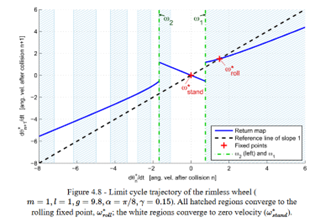

### 4.2.2. The Compass Gait (Dáng đi Compa)



####**a. Mô tả:**


* Mô hình này giữ các giả định của *Rimless Wheel* (va chạm mềm, chân không trượt).
* **Điểm khác biệt:** Bỏ giả định "luôn có chân vung sẵn sàng". Thay vào đó, mô hình gồm 2 chân nối với nhau tại khớp hông (Hip).
* **Cấu tạo:**
    * Hai chân giống hệt nhau, chiều dài $l$.
    * Khối lượng tập trung: $m_h$ tại hông, $m$ tại mỗi chân.
    * Vị trí khối lượng chân được xác định bởi khoảng cách $a$ (từ hông) và $b$ (từ bàn chân), với $l = a + b$.
* **Biến trạng thái:** $q = [\theta_{st}, \theta_{sw}]^T$, trong đó $\theta_{st}$ là góc chân trụ (stance) và $\theta_{sw}$ là góc chân vung (swing).


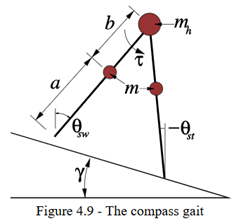


####**b. Phương trình động lực học:**


Ta có phương trình động lực học:
$$M(q)\ddot{q} + C(q, \dot{q})\dot{q} = \tau_g(q) + Bu$$

Trong đó:

**1. Ma trận quán tính (Inertia Matrix) $M$:**
$$M = \begin{bmatrix} (m_h + m)l^2 + ma^2 & -mlb \cos(\theta_{st} - \theta_{sw}) \\ -mlb \cos(\theta_{st} - \theta_{sw}) & mb^2 \end{bmatrix}$$
* Phản ánh quán tính của hông, chân và sự tương tác động lực học giữa hai chân.

**2. Ma trận Coriolis & Ly tâm $C$:**
$$C = \begin{bmatrix} 0 & -mlb \sin(\theta_{st} - \theta_{sw})\dot{\theta}_{sw} \\ mlb \sin(\theta_{st} - \theta_{sw})\dot{\theta}_{st} & 0 \end{bmatrix}$$

**3. Vector trọng lực $\tau_g$ (Gravity Vector):**
$$\tau_g(q) = \begin{bmatrix} (m_h l + ma + ml)g \sin(\theta_{st}) \\ -mbg \sin(\theta_{sw}) \end{bmatrix}$$
* Chú ý dấu của các thành phần do quy ước chiều góc.

**4. Ma trận đầu vào $B$:**
$$B = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$$
* $u$: Mô-men xoắn (torque) tác động tại khớp hông.
* Ma trận $B$ cho thấy mô-men này tác động ngược chiều nhau lên chân trụ và chân vung (định luật 3 Newton).

#### c. Foot Collision (Va chạm bàn chân)



Khi chân vung chạm đất, một va chạm xung lực xảy ra làm vận tốc khớp thay đổi tức thời. Để tính toán chính xác mà không phụ thuộc vào hệ tọa độ gắn với chân, ta sử dụng phương pháp **Đế nổi (Floating Base)**.

**Quy trình tính toán vận tốc sau va chạm:**

1.  **Thêm đế nổi:** Tưởng tượng ngón chân trụ cũ không còn cố định mà có thể di chuyển tự do $(x, y)$. Vector cấu hình mở rộng:
$$q_{fb} = [x, y, \theta_{st}, \theta_{sw}]^T$$

2.  **Tính toán động lực học mở rộng:** Tính ma trận khối lượng $M_{fb}$ cho hệ thống đế nổi này.

3.  **Xác định ràng buộc va chạm:** Vị trí ngón chân vung (điểm sắp chạm đất) được biểu diễn bởi hàm động học thuận $\phi(q_{fb})$. Tính ma trận Jacobian tại điểm đó:
$$J = \frac{\partial \phi}{\partial q_{fb}}$$

4.  **Cập nhật vận tốc ($\dot{q}^+$):**
    Sử dụng công thức va chạm dẻo (xung lực triệt tiêu vận tốc tại điểm chạm):
    $$\dot{q}^+ = [I - M_{fb}^{-1}J^T(JM_{fb}^{-1}J^T)^{-1}J]\dot{q}^-$$
    *(Lưu ý: Đầu vào $\dot{q}^-$ có $\dot{x}^- = \dot{y}^- = 0$. Kết quả $\dot{q}^+$ sẽ cho ta vận tốc góc mới của hai chân)*.

5.  **Đổi vai trò chân (Relabeling):**
    Sau va chạm, chân vung cũ trở thành chân trụ mới. Ta phải hoán đổi các biến trạng thái:
    * $\theta_{st}^{new} = \theta_{sw}^{old}$
    * $\theta_{sw}^{new} = \theta_{st}^{old}$

#### d. Forward Simulation


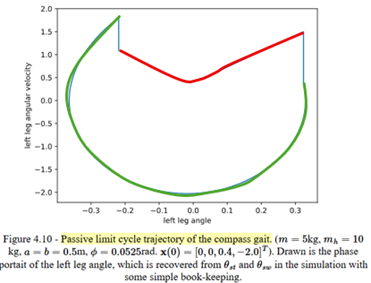

Đồ thị pha (Phase portrait) của góc chân trái minh họa quá trình di chuyển ổn định:

* **Đường màu đỏ:** Pha chân trụ (Stance phase). Động lực học tương tự con lắc ngược.
* **Đường màu xanh lá:** Pha chân vung (Swing phase). Chân di chuyển tự do dưới tác động của trọng lực và quán tính.
* **Đường màu xanh dương (thẳng đứng):** Sự kiện va chạm. Vận tốc thay đổi đột ngột (gián đoạn) tại thời điểm gót chân chạm đất (Heel-strike).

**Nhận xét:**
* Hệ thống Compass Gait có thể tạo ra các **Chu kỳ giới hạn thụ động (Passive Limit Cycles)** ổn định khi đi xuống dốc mà không cần bất kỳ điều khiển nào ($u=0$), chỉ nhờ vào sự chuyển hóa thế năng thành động năng bù cho va chạm.

In [19]:
#@title Mô phỏng The Compass gait
!pip install mpld3
!pip install drake
!pip install underactuated
import mpld3
from IPython.display import display
from matplotlib import pyplot as plt
from pydrake.all import (
    ConstantVectorSource,
    DiagramBuilder,
    LogVectorOutput,
    MeshcatVisualizer,
    SceneGraph,
    Simulator,
    StartMeshcat,
)
from pydrake.examples import CompassGait, CompassGaitGeometry

from underactuated import running_as_notebook



In [20]:
# Chạy để hiển thị mô phỏng
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7001


In [23]:
#@title Đồ thị pha
if running_as_notebook:
    mpld3.enable_notebook()
def compass_gait():
    builder = DiagramBuilder()
    compass_gait = builder.AddSystem(CompassGait())

    hip_torque = builder.AddSystem(ConstantVectorSource([0.0]))
    builder.Connect(hip_torque.get_output_port(0), compass_gait.get_input_port(0))

    scene_graph = builder.AddSystem(SceneGraph())
    CompassGaitGeometry.AddToBuilder(
        builder,
        compass_gait.get_floating_base_state_output_port(),
        scene_graph,
    )
    visualizer = MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat)
    meshcat.Set2dRenderMode(xmin=-1, xmax=5, ymin=-1, ymax=2)

    logger = LogVectorOutput(compass_gait.get_output_port(1), builder)

    diagram = builder.Build()
    simulator = Simulator(diagram)

    context = simulator.get_mutable_context()
    context.SetAccuracy(1e-4)
    context.SetContinuousState([0.0, 0.0, 0.4, -2.0])

    visualizer.StartRecording(False)
    simulator.AdvanceTo(10.0)
    visualizer.PublishRecording()
    log = logger.FindLog(context)
    plt.figure()
    plt.plot(log.data()[4, :], log.data()[11, :])
    plt.xlabel("left leg angle")
    plt.ylabel("left leg angular velocity")
    display(mpld3.display())


compass_gait()

## 4.2.3. The Kneed Walker


####**a. Mô tả:**


* **Cấu tạo:** So với mô hình *The Compass Gait*, mô hình này có thêm khớp gối (knees) ở mỗi chân.
* **Ưu điểm:**
    * Giúp robot có dáng đi giống người hơn.
    * Bước chân có độ nâng (foot clearance) tốt hơn, giúp tránh vấp ngã (scuffing) và dễ dàng di chuyển trên địa hình gồ ghề.
* **Chu kỳ bước đi (Gait Cycle):**
    Quá trình bước đi bao gồm các giai đoạn nối tiếp nhau:
  $$Bắt \ đầu \ bước \rightarrow Knee\text{-}strike \rightarrow Heel\text{-}strike \rightarrow Bắt \ đầu \ bước$$



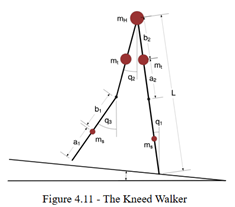
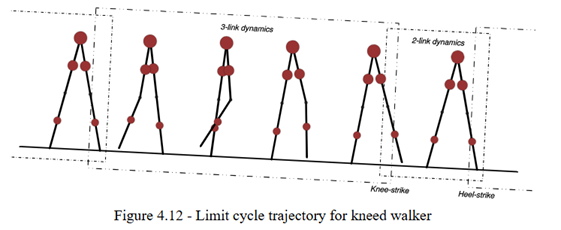

####**b. Forward Simulation:**



Kết quả mô phỏng cho thấy quỹ đạo của hệ thống trên không gian pha (Phase portrait) của chân phải:
* **Tương đồng:** Về cơ bản tương tự như trường hợp *Compass Gait*.
* **Điểm gián đoạn:** Các đường quỹ đạo có những điểm gãy khúc (gián đoạn) rõ rệt. Những điểm này thể hiện sự thay đổi vận tốc tức thời do hai loại va chạm gây ra:
    1.  **Heel-strike:** Va chạm của gót chân với mặt đất (chuyển chân trụ).
    2.  **Knee-strike:** Va chạm của khớp gối khi chân vung duỗi thẳng ra (khóa khớp gối trước khi chạm đất).

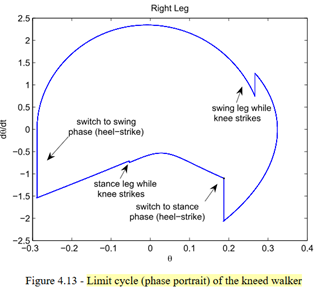

#4.3. Mô hình chạy đơn giản: SLIP (Spring-Loaded Inverted Pendulum)

####**a. Mô tả:**


* Đây là mô hình cơ bản nhất để nghiên cứu hành vi chạy (running).
* **Cấu tạo:** Một khối lượng điểm $m$ gắn trên một chân lò xo không khối lượng. Lò xo có độ dài nghỉ $l_0$ và độ cứng $k$.
* **Cấu hình:** Được xác định bởi vị trí trọng tâm $(x, z)$, chiều dài chân $r$ và góc chân $\theta$.
* **Động lực học:** Là hệ lai (Hybrid system), chuyển đổi liên tục giữa hai pha: Pha bay (Flight) và Pha chống (Stance).



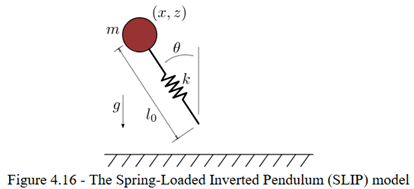

####**b. Các pha chuyển động:**



**1. Pha bay (Flight phase):**
* Chân không chạm đất. Hệ thống hoạt động như vật ném xiên dưới tác động của trọng lực.
* **Biến trạng thái:** $x = [x, z, \dot{x}, \dot{z}]^T$.
* **Phương trình:** $\ddot{x} = 0, \quad \ddot{z} = -g$.
* **Điều khiển:** Do chân không khối lượng, ta có thể điều chỉnh góc chân $\theta$ ngay lập tức. Góc đặt chân $\theta_{td}$ đóng vai trò là đầu vào điều khiển $u$ cho bước chạy tiếp theo.

**2. Pha chống (Stance phase):**
* Chân chạm đất và neo tại một điểm cố định. Hệ thống hoạt động trong tọa độ cực $(r, \theta)$.
* **Vị trí khối lượng:** $x = -r\sin\theta, \quad z = r\cos\theta$.
* **Năng lượng:**
    * Động năng: $T = \frac{1}{2}m(\dot{r}^2 + r^2\dot{\theta}^2)$.
    * Thế năng: $V = mgr\cos\theta + \frac{1}{2}k(l_0 - r)^2$.
* **Phương trình động lực học:** Bảo toàn năng lượng và động lượng (sử dụng phương trình Lagrange), giả định pha này hoàn toàn thụ động (ballistic), không có mô-men xoắn điều khiển.

**3. Sự kiện chuyển pha (Transitions):**

* **Touchdown (Bay $\rightarrow$ Chống):**
    * Xảy ra khi chân chạm đất: $z \le l_0 \cos\theta$.
    * **Lưu ý quan trọng:** Khác với mô hình *Rimless Wheel*, do chân lò xo được giả định là không khối lượng, **không có năng lượng nào bị mất** trong quá trình va chạm này. Vận tốc được bảo toàn, chỉ có mô hình động lực học thay đổi.

* **Liftoff (Chống $\rightarrow$ Bay):**
    * Xảy ra khi lò xo dãn hết cỡ về chiều dài nghỉ ban đầu: $r \ge l_0$.


In [32]:
#@title Mô phỏng SLIP:
!pip install mpld3
!pip install drake
!pip install underactuated
import copy
import mpld3
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
from pydrake.all import (
    BasicVector,
    ConstantVectorSource,
    DiagramBuilder,
    LeafSystem,
    LogVectorOutput,
    PortDataType,
    PublishEvent,
    PyPlotVisualizer,
    Simulator,
    StartMeshcat,
    UnrestrictedUpdateEvent,
    WitnessFunctionDirection,
    namedview,
)

from underactuated import running_as_notebook
from underactuated.pyplot_utils import AdvanceToAndVisualize

if running_as_notebook:
    mpld3.enable_notebook()
SLIPState = namedview(
    "SLIPState", ["x", "z", "r", "theta", "xdot", "zdot", "rdot", "thetadot"]
)


class SpringLoadedInvertedPendulum(LeafSystem):
    def __init__(self):
        LeafSystem.__init__(self)

        self.DeclareVectorInputPort("touchdown_angle", 1)
        state_index = self.DeclareContinuousState(BasicVector(np.zeros(8)), 4, 4, 0)
        self.DeclareStateOutputPort("state", state_index)

        # Parameters from Geyer05, p.23
        self.mass = 80.0  # kg
        self.r0 = 1.0  # m
        self.gravity = 9.81  # m/s^2
        # Define spring constant in terms of the dimensionless number.
        # Definition in section 2.4.3, values in figure 2.4.
        # Note: Geyer05 says 10.8 (which doesn't work? -- I get no fixed pts).
        dimensionless_spring_constant = 10.7
        self.stiffness = (
            dimensionless_spring_constant * self.mass * self.gravity / self.r0
        )

        self.last_apex = None  # placeholder for writing return map result.

        self.touchdown_witness = self.MakeWitnessFunction(
            "touchdown",
            WitnessFunctionDirection.kPositiveThenNonPositive,
            self.foot_height,
            UnrestrictedUpdateEvent(self.touchdown),
        )
        self.takeoff_witness = self.MakeWitnessFunction(
            "takeoff",
            WitnessFunctionDirection.kPositiveThenNonPositive,
            self.leg_compression,
            UnrestrictedUpdateEvent(self.takeoff),
        )
        self.apex_witness = self.MakeWitnessFunction(
            "apex",
            WitnessFunctionDirection.kPositiveThenNonPositive,
            self.apex,
            PublishEvent(self.publish_apex),
        )

    def foot_height(self, context):
        s = SLIPState(context.get_continuous_state_vector().CopyToVector())
        return s.z - self.r0 * np.cos(s.theta)

    def touchdown(self, context, event, state):
        s = SLIPState(context.get_mutable_continuous_state_vector().CopyToVector())

        # print("touchdown")

        # Update rdot and thetadot to match xdot and ydot, using
        # x = -r*sin(theta), z = r*cos(theta)
        #  => xdot = -rdot*s - r*c*thetadot, zdot = rdot*c - r*s*thetadot
        #  => xdot*c + zdot*s = -r*thetadot
        # r^2 = x^2 + z^2
        #  => 2r*rdot = 2x*xdot + 2z*zdot
        #  => rdot = -xdot*sin(theta) + zdot*cos(theta)
        # (matches Geyer05 Eq. 2.24 up to the symbol changes)
        s.r = self.r0
        s.rdot = -s.xdot * np.sin(s.theta) + s.zdot * np.cos(s.theta)
        s.thetadot = -(s.xdot * np.cos(s.theta) + s.zdot * np.sin(s.theta)) / self.r0
        state.get_mutable_continuous_state().get_mutable_vector().SetFromVector(s[:])

    def leg_compression(self, context):
        s = SLIPState(context.get_continuous_state_vector().CopyToVector())
        return self.r0 - s.r

    def takeoff(self, context, event, state):
        s = SLIPState(context.get_mutable_continuous_state_vector().CopyToVector())

        # print("takeoff")

        # Setup flight state (these lines aren't strictly required, since we
        # choose to also integrate x and z in stance below).
        s.z = self.r0 * np.cos(s.theta)
        s.xdot = -s.rdot * np.sin(s.theta) - self.r0 * s.thetadot * np.cos(s.theta)
        s.zdot = s.rdot * np.cos(s.theta) - self.r0 * s.thetadot * np.sin(s.theta)

        # Update theta to commanded leg angle.
        s.theta = self.EvalVectorInput(context, 0).GetAtIndex(0)
        s.thetadot = 0
        s.r = self.r0
        s.rdot = 0

        state.get_mutable_continuous_state().get_mutable_vector().SetFromVector(s[:])

    def apex(self, context):
        return context.get_continuous_state_vector().GetAtIndex(5)  # zdot

    def publish_apex(self, context, event):
        # TODO(russt): provide an option to terminate here instead, pending
        # resolution of #4447.
        # print("apex")
        if self.last_apex is None:
            s = SLIPState(context.get_mutable_continuous_state_vector().CopyToVector())
            self.last_apex = s.z

    def apex_velocity_from_dimensionless_system_energy(self, Etilde, z):
        E = Etilde * self.mass * self.gravity * self.r0
        # E = 0.5*m*v^2 + m*g*z
        xdot = np.sqrt(2.0 / self.mass * (E - self.mass * self.gravity * z))
        return xdot

    def energy_flight(self, context):
        s = SLIPState(context.get_mutable_continuous_state_vector().CopyToVector())
        return (
            0.5 * self.mass * (s.xdot**2 + s.zdot**2) + self.mass * self.gravity * s.z
        )

    def energy_stance(self, context):
        s = SLIPState(context.get_mutable_continuous_state_vector().CopyToVector())
        return (
            0.5 * self.mass * (s.rdot**2 + s.r**2 * s.thetadot**2)
            + self.mass * self.gravity * s.r * np.cos(s.theta)
            + 0.5 * self.stiffness * (self.r0 - s.r) ** 2
        )

    def DoGetWitnessFunctions(self, context):
        return [
            self.touchdown_witness,
            self.takeoff_witness,
            self.apex_witness,
        ]

    def DoCalcTimeDerivatives(self, context, derivatives):
        s = SLIPState(context.get_continuous_state_vector().CopyToVector())
        sdot = SLIPState(np.zeros(8))
        sdot[0:4] = s[4:8]

        if self.foot_height(context) < 0:
            # then we're in "stance"
            sdot.rdot = (
                self.stiffness / self.mass * (self.r0 - s.r)
                + s.r * s.thetadot**2
                - self.gravity * np.cos(s.theta)
            )
            sdot.thetadot = (
                self.gravity / s.r * np.sin(s.theta) - 2 * s.rdot * s.thetadot / s.r
            )

            # Integrate x and z also, just for the sake of visualization (all
            # the integrated values except x will be overwritten in the
            # take-off reset).
            # x = -r*sin(theta), y = r*cos(theta) =>
            sdot.xdot = (
                -sdot.rdot * np.sin(s.theta)
                - 2 * s.rdot * s.thetadot * np.cos(s.theta)
                + s.r * s.thetadot**2 * np.sin(s.theta)
                - s.r * sdot.thetadot * np.cos(s.theta)
            )
            sdot.zdot = (
                sdot.rdot * np.cos(s.theta)
                - 2 * s.rdot * s.thetadot * np.sin(s.theta)
                - s.r * sdot.thetadot * np.sin(s.theta)
                - s.r * s.thetadot**2 * np.cos(s.theta)
            )

        else:
            sdot.xdot = 0
            sdot.zdot = -self.gravity
            sdot.rdot = 0
            sdot.thetadot = 0

        derivatives.get_mutable_vector().SetFromVector(sdot[:])


class SLIPVisualizer(PyPlotVisualizer):
    def __init__(self, ax=None, show=True):
        PyPlotVisualizer.__init__(self, ax=ax, show=show, figsize=(12, 4))
        self.DeclareInputPort("slip_state", PortDataType.kVectorValued, 8)
        self.ax.set_aspect("equal")
        self.ax.set_xlim(0, 2)
        self.ax.set_ylim(-0.1, 1.5)

        # Draw the ground.
        self.ax.plot([-50, 50], [0, 0], "k")

        a = np.linspace(0, 2 * np.pi, 50)
        radius = 0.1
        self.hip_fill = self.ax.fill(
            radius * np.sin(a),
            radius * np.cos(a),
            zorder=1,
            edgecolor="k",
            facecolor=[0.6, 0.6, 0.6],
        )
        self.hip = copy.copy(self.hip_fill[0].get_path().vertices)

        self.leg_line = [self.ax.plot([0, 0], [0, -1], "k")[0]]
        self.leg_data = [self.leg_line[0].get_xydata().T]
        for i in range(1, 13):
            self.leg_line.append(
                self.ax.plot(
                    0.1
                    * np.array(
                        [
                            np.sin((i - 1) * np.pi / 2.0),
                            np.sin(i * np.pi / 2.0),
                        ]
                    ),
                    -0.2 - 0.7 / 13 * np.array([i - 1, i]),
                    "k",
                )[0]
            )
            self.leg_data.append(self.leg_line[i].get_xydata().T)

    def draw(self, context):
        state = SLIPState(self.EvalVectorInput(context, 0).CopyToVector())

        self.hip_fill[0].get_path().vertices[:, 0] = state.x + self.hip[:, 0]
        self.hip_fill[0].get_path().vertices[:, 1] = state.z + self.hip[:, 1]

        R = np.array(
            [
                [np.cos(state.theta), -np.sin(state.theta)],
                [np.sin(state.theta), np.cos(state.theta)],
            ]
        )
        for i in range(len(self.leg_line)):
            self.leg_line[i].set_xdata(
                state.x + state.r * R[0, :].dot(self.leg_data[i])
            )
            self.leg_line[i].set_ydata(
                state.z + state.r * R[1, :].dot(self.leg_data[i])
            )

        self.ax.set_title("t = {:.1f}".format(context.get_time()))

In [34]:
#@title
def slip_demo():
    builder = DiagramBuilder()
    plant = builder.AddSystem(SpringLoadedInvertedPendulum())

    # Parameters from Geyer05, Figure 2.4
    # Note: Geyer uses angle of attack = 90 - touchdown_angle
    touchdown_angle = np.deg2rad(30)
    Etilde = 1.61 # thay đổi để có mức năng lượng phù hợp

    s = SLIPState(np.zeros(8))
    s.z = 0.9
    s.theta = touchdown_angle
    s.r = 1
    s.xdot = plant.apex_velocity_from_dimensionless_system_energy(Etilde, s.z)

    visualizer = builder.AddSystem(SLIPVisualizer(show=False))
    builder.Connect(plant.get_output_port(0), visualizer.get_input_port(0))

    LogVectorOutput(plant.get_output_port(0), builder)

    command = builder.AddSystem(ConstantVectorSource([touchdown_angle]))
    builder.Connect(command.get_output_port(0), plant.get_input_port(0))

    diagram = builder.Build()
    simulator = Simulator(diagram)
    context = simulator.get_mutable_context()
    context.SetAccuracy(1e-10)

    context.get_mutable_continuous_state_vector().SetFromVector(s[:])

    AdvanceToAndVisualize(simulator, visualizer, 2.0)


slip_demo()

simulating...  

done.
generating animation...


In [35]:
#@title Bản đồ pha
def slip_map():
    plant = SpringLoadedInvertedPendulum()

    # Parameters from Geyer05, Figure 2.4
    # Note: Geyer uses angle of attack = 90 - touchdown_angle
    touchdown_angle = np.deg2rad(30)
    Etilde = 1.61 #1.65;1.7

    s = SLIPState(np.zeros(8))
    s.theta = touchdown_angle
    s.r = 1

    simulator = Simulator(plant)
    context = simulator.get_mutable_context()
    plant.get_input_port(0).FixValue(context, [touchdown_angle])
    context.SetAccuracy(1e-5)

    zs = np.linspace(np.cos(touchdown_angle) + 0.001, 0.95, 25)
    zns = 0 * zs
    for i in range(len(zs)):
        s.z = zs[i]
        s.xdot = plant.apex_velocity_from_dimensionless_system_energy(Etilde, s.z)
        context.SetTime(0.0)
        context.get_mutable_continuous_state_vector().SetFromVector(s[:])
        simulator.Initialize()
        # Note: With this duration, I sometimes get an extra "touchdown" after the
        # apex, which results in apex-touchdown; touchdown-takeoff-apex on the
        # console.  It's not a double reset, the consecutive touchdowns are two
        # different sims.
        simulator.AdvanceTo(0.6)
        zns[i] = plant.last_apex
        plant.last_apex = None

    fig, ax = plt.subplots()
    ax.plot(zs, zns)
    ax.plot(zs, zs)
    ax.axis("equal")
    ax.set_xlim([zs[0], zs[-1]])
    ax.set_ylim([zs[0], zs[-1]])
    ax.set_xlabel("apex height z[n]")
    ax.set_ylabel("apex height z[n+1]")

    display(mpld3.display())


slip_map()


####**c. Phân tích bản đồ Apex-to-Apex (Đỉnh đến Đỉnh):**



Đây là công cụ chính để xét tính ổn định của dáng chạy. Ta chọn mặt cắt Poincaré $S$ tại **đỉnh cao nhất của quỹ đạo bay (Apex)**, nơi vận tốc thẳng đứng $\dot{z} = 0$.

* **Giảm số chiều biến trạng thái:**
    * Bỏ qua vị trí ngang $x$ và góc chân (vì chúng không ảnh hưởng đến động lực học trong pha bay tiếp theo).
    * Tại đỉnh, hệ thống chỉ còn 2 biến quan trọng: độ cao đỉnh $z_{apex}$ và vận tốc ngang $\dot{x}_{apex}$.

* **Bảo toàn năng lượng:**
    * Tổng năng lượng của hệ là hằng số ($E_{total} = const$). Tại đỉnh:
      $$E_{apex} = \frac{1}{2}m\dot{x}^2 + mgz_{apex} = E_0$$
    * Nếu biết năng lượng tổng $E_0$ và độ cao $z$, ta hoàn toàn suy ra được vận tốc $\dot{x}$. Do đó, bài toán quy về bản đồ 1 chiều quan hệ giữa các độ cao đỉnh liên tiếp:
      $$z_{n+1} = P(z_n)$$

* **Tham số không thứ nguyên (Dimensionless):**
    Để phân tích tổng quát hơn, ta thường dùng năng lượng và độ cứng chuẩn hóa:
    $$\tilde{E} = \frac{E}{mgl_0}, \quad \tilde{k} = \frac{kl_0}{mg}$$


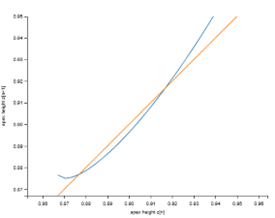

**Giải thích các hiện tượng trên đồ thị (Failure Modes):**
1.  **Đồ thị bị cắt cụt (Cut-off):** Xảy ra khi đỉnh $z$ quá thấp ($z < l_0 \cos\theta_{td}$). Chân sẽ chạm đất ngay trước khi khối tâm đạt đến đỉnh quỹ đạo. Bản đồ Poincaré không xác định tại vùng này.
2.  **Chạy ngược/Ngã (Reflection):** Xảy ra khi độ cao $z$ quá lớn so với năng lượng tổng $\tilde{E}$ (nghĩa là vận tốc ngang $\dot{x}$ quá nhỏ). Hệ thống không đủ động năng để "vượt đỉnh" trong pha chống. Khối tâm sẽ nén lò xo rồi bị đẩy ngược lại phía sau thay vì chạy tiếp sang chu kỳ mới.

#### **d. SLIP Control (Điều khiển SLIP)**



Trong mô hình SLIP tiêu chuẩn (chân không khối lượng), chúng ta có một lợi thế lớn: **chân có thể di chuyển đến bất kỳ vị trí nào ngay lập tức** trong pha bay mà không tốn năng lượng. Điều này cho phép ta chọn góc đặt chân ($\theta_{td}$) làm đầu vào điều khiển ($u$) để quy định trạng thái của bước nhảy tiếp theo.

Mục tiêu: Điều chỉnh $\theta_{td}$ để đạt được độ cao đỉnh ($z_{apex}$) hoặc vận tốc ($ \dot{x}_{apex}$) mong muốn.

**1. Điều khiển Deadbeat (Nghịch đảo bản đồ):**
Đây là phương pháp điều khiển chính xác nhất về mặt lý thuyết.
* Ta có bản đồ Poincaré (Apex-to-Apex map) mô tả trạng thái tiếp theo dựa trên trạng thái hiện tại và góc đặt chân:
  $$z_{n+1} = P(z_n, \theta_{td})$$
* Nếu muốn robot đạt độ cao mong muốn $z_{des}$ ở bước sau, ta cần tìm $\theta_{td}$ sao cho:
  $$P(z_n, \theta_{td}) = z_{des}$$
* **Thực thi:** Do hàm $P$ của SLIP không có dạng giải tích đóng (không viết được công thức tường minh), ta thường dùng các phương pháp tìm nghiệm số (như `fminsearch` hoặc `fsolve`) trong mỗi bước để tìm $\theta_{td}$ tối ưu.

**2. Bộ điều khiển bước chân Raibert (Raibert Stepping Controller):**
Mark Raibert (người sáng lập Boston Dynamics) đã đề xuất một phương pháp điều khiển trực quan và đơn giản hơn, dựa trên xấp xỉ tuyến tính, rất nổi tiếng trong giới robotics.

**Nguyên lý:**
* **Neutral Point (Điểm trung hòa):** Là điểm đặt chân mà tại đó robot không tăng tốc cũng không giảm tốc ($x_{neutral} \approx \frac{\dot{x} T_s}{2}$).
* **Tăng tốc:** Đặt chân về phía *sau* điểm trung hòa (đẩy người tới).
* **Giảm tốc:** Đặt chân về phía *trước* điểm trung hòa (tạo lực hãm).

**Công thức điều khiển vị trí chân ($x_{td}$):**
$$x_{td} = \frac{\dot{x} T_s}{2} + k_{\dot{x}} (\dot{x} - \dot{x}_{des})$$

Trong đó:
* $\frac{\dot{x} T_s}{2}$: Thành phần ước lượng điểm trung hòa (với $T_s$ là thời gian pha chống dự kiến).
* $k_{\dot{x}}$: Hệ số phản hồi (Feedback gain).
* $(\dot{x} - \dot{x}_{des})$: Sai số vận tốc.

**3. Phân rã bộ điều khiển (Decoupled Control):**
Raibert đề xuất tách bài toán điều khiển phức tạp thành 3 bộ điều khiển độc lập hoạt động song song:
1.  **Hopping Height (Độ cao):** Điều khiển năng lượng (thêm lực đẩy lò xo) để giữ độ cao nhảy.
2.  **Forward Speed (Vận tốc tới):** Điều khiển góc đặt chân ($\theta_{td}$) như công thức trên.
3.  **Posture (Tư thế):** Điều khiển mô-men hông (torso torque) để giữ thân người thẳng đứng trong pha chống.